In [638]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [262]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)

In [264]:
df = pd.read_csv("Auction_export_cleaned")
df.drop(columns = ["Unnamed: 0", "Body"], inplace = True)

In [266]:
df.head()

,Year,Brand,Model,State,Milage,Color,Price
0,2005,HYUNDAI,TUCSON,Florida,110980.0,SILVER,925
1,2004,HONDA,ACCORD,Florida,154354.0,GOLD,525
2,2015,FORD,FUSION,Georgia,161165.0,GRAY,950
3,2005,HONDA,ACCORD,Georgia,248180.0,DARK BLUE,550
4,2013,FORD,ESCAPE,Virginia,287145.0,WHITE,1200


In [268]:
#changing all categorical values to continuous values
brand_dummies = pd.get_dummies(df.Brand)
State_dummies = pd.get_dummies(df.State)
Color_dummies = pd.get_dummies(df.Color)
df["Model_label"] = LabelEncoder().fit_transform(df.Model)

In [270]:
df_1 = pd.concat([df, brand_dummies, State_dummies, Color_dummies], axis = 1)

In [272]:
data = df_1.drop(columns = ["Brand", "Model", "State", "Color"]).replace(True, 1).replace(False, 0)

In [274]:
data.shape

(2019, 86)

In [276]:
X = data.drop(columns = "Price")
y = data.Price

In [550]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [552]:
#Creating a linear regression Model
Lmodel = LinearRegression()

In [554]:
Lmodel.fit(x_train, y_train)

LinearRegression()

In [556]:
y_pred = Lmodel.predict(x_test)

In [558]:
Lmodel_score = r2_score(y_test, y_pred)

In [560]:
Lmodel_MAE = mean_absolute_error(y_test, y_pred)

In [562]:
#Creating a Ridge regression model
Rmodel = Ridge(alpha = 100)
Rmodel.fit(x_train, y_train)

Ridge(alpha=100)

In [564]:
y_pred = Rmodel.predict(x_test)

In [566]:
Rmodel_score = r2_score(y_test, y_pred)

In [568]:
Rmodel_MAE = mean_absolute_error(y_test, y_pred)

In [570]:
#Creating a random forest regression model
RFmodel = RandomForestRegressor()

In [572]:
RFmodel.fit(x_train, y_train)

RandomForestRegressor()

In [574]:
y_pred = RFmodel.predict(x_test)

In [576]:
RFmodel_score = r2_score(y_test, y_pred)

In [578]:
RFmodel_MAE = mean_absolute_error(y_test, y_pred)

In [580]:
#creating a decision tree regression model
tree_model = DecisionTreeRegressor()

In [582]:
tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [584]:
y_pred = tree_model.predict(x_test)

In [586]:
tree_model_score = r2_score(y_test, y_pred)

In [588]:
tree_model_MAE = mean_absolute_error(y_test, y_pred)

In [590]:
#Creating a Gradient Boosting Regression model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [592]:
y_pred = gbr.predict(x_test)

In [594]:
gbr_score = r2_score(y_test, y_pred)

In [596]:
gbr_MAE = mean_absolute_error(y_test, y_pred)

In [598]:
#creating a table for all the regression models and their metrics
table = {
    "Regressor": ["Linear", "Ridge", "Random Forest", "Decision Tree", "Gradient Boosting"],
    "R2 Score": [Lmodel_score, Rmodel_score, RFmodel_score, tree_model_score, gbr_score],
     "MAE": [Lmodel_MAE, Rmodel_MAE, RFmodel_MAE, tree_model_MAE, gbr_MAE]
}

In [628]:
results = pd.DataFrame(table)
results

,Regressor,R2 Score,MAE
0,Linear,0.270375,1126.041726
1,Ridge,0.293865,1085.284345
2,Random Forest,0.660679,632.535990
3,Decision Tree,0.414451,828.415842
4,Gradient Boosting,0.649339,655.458666


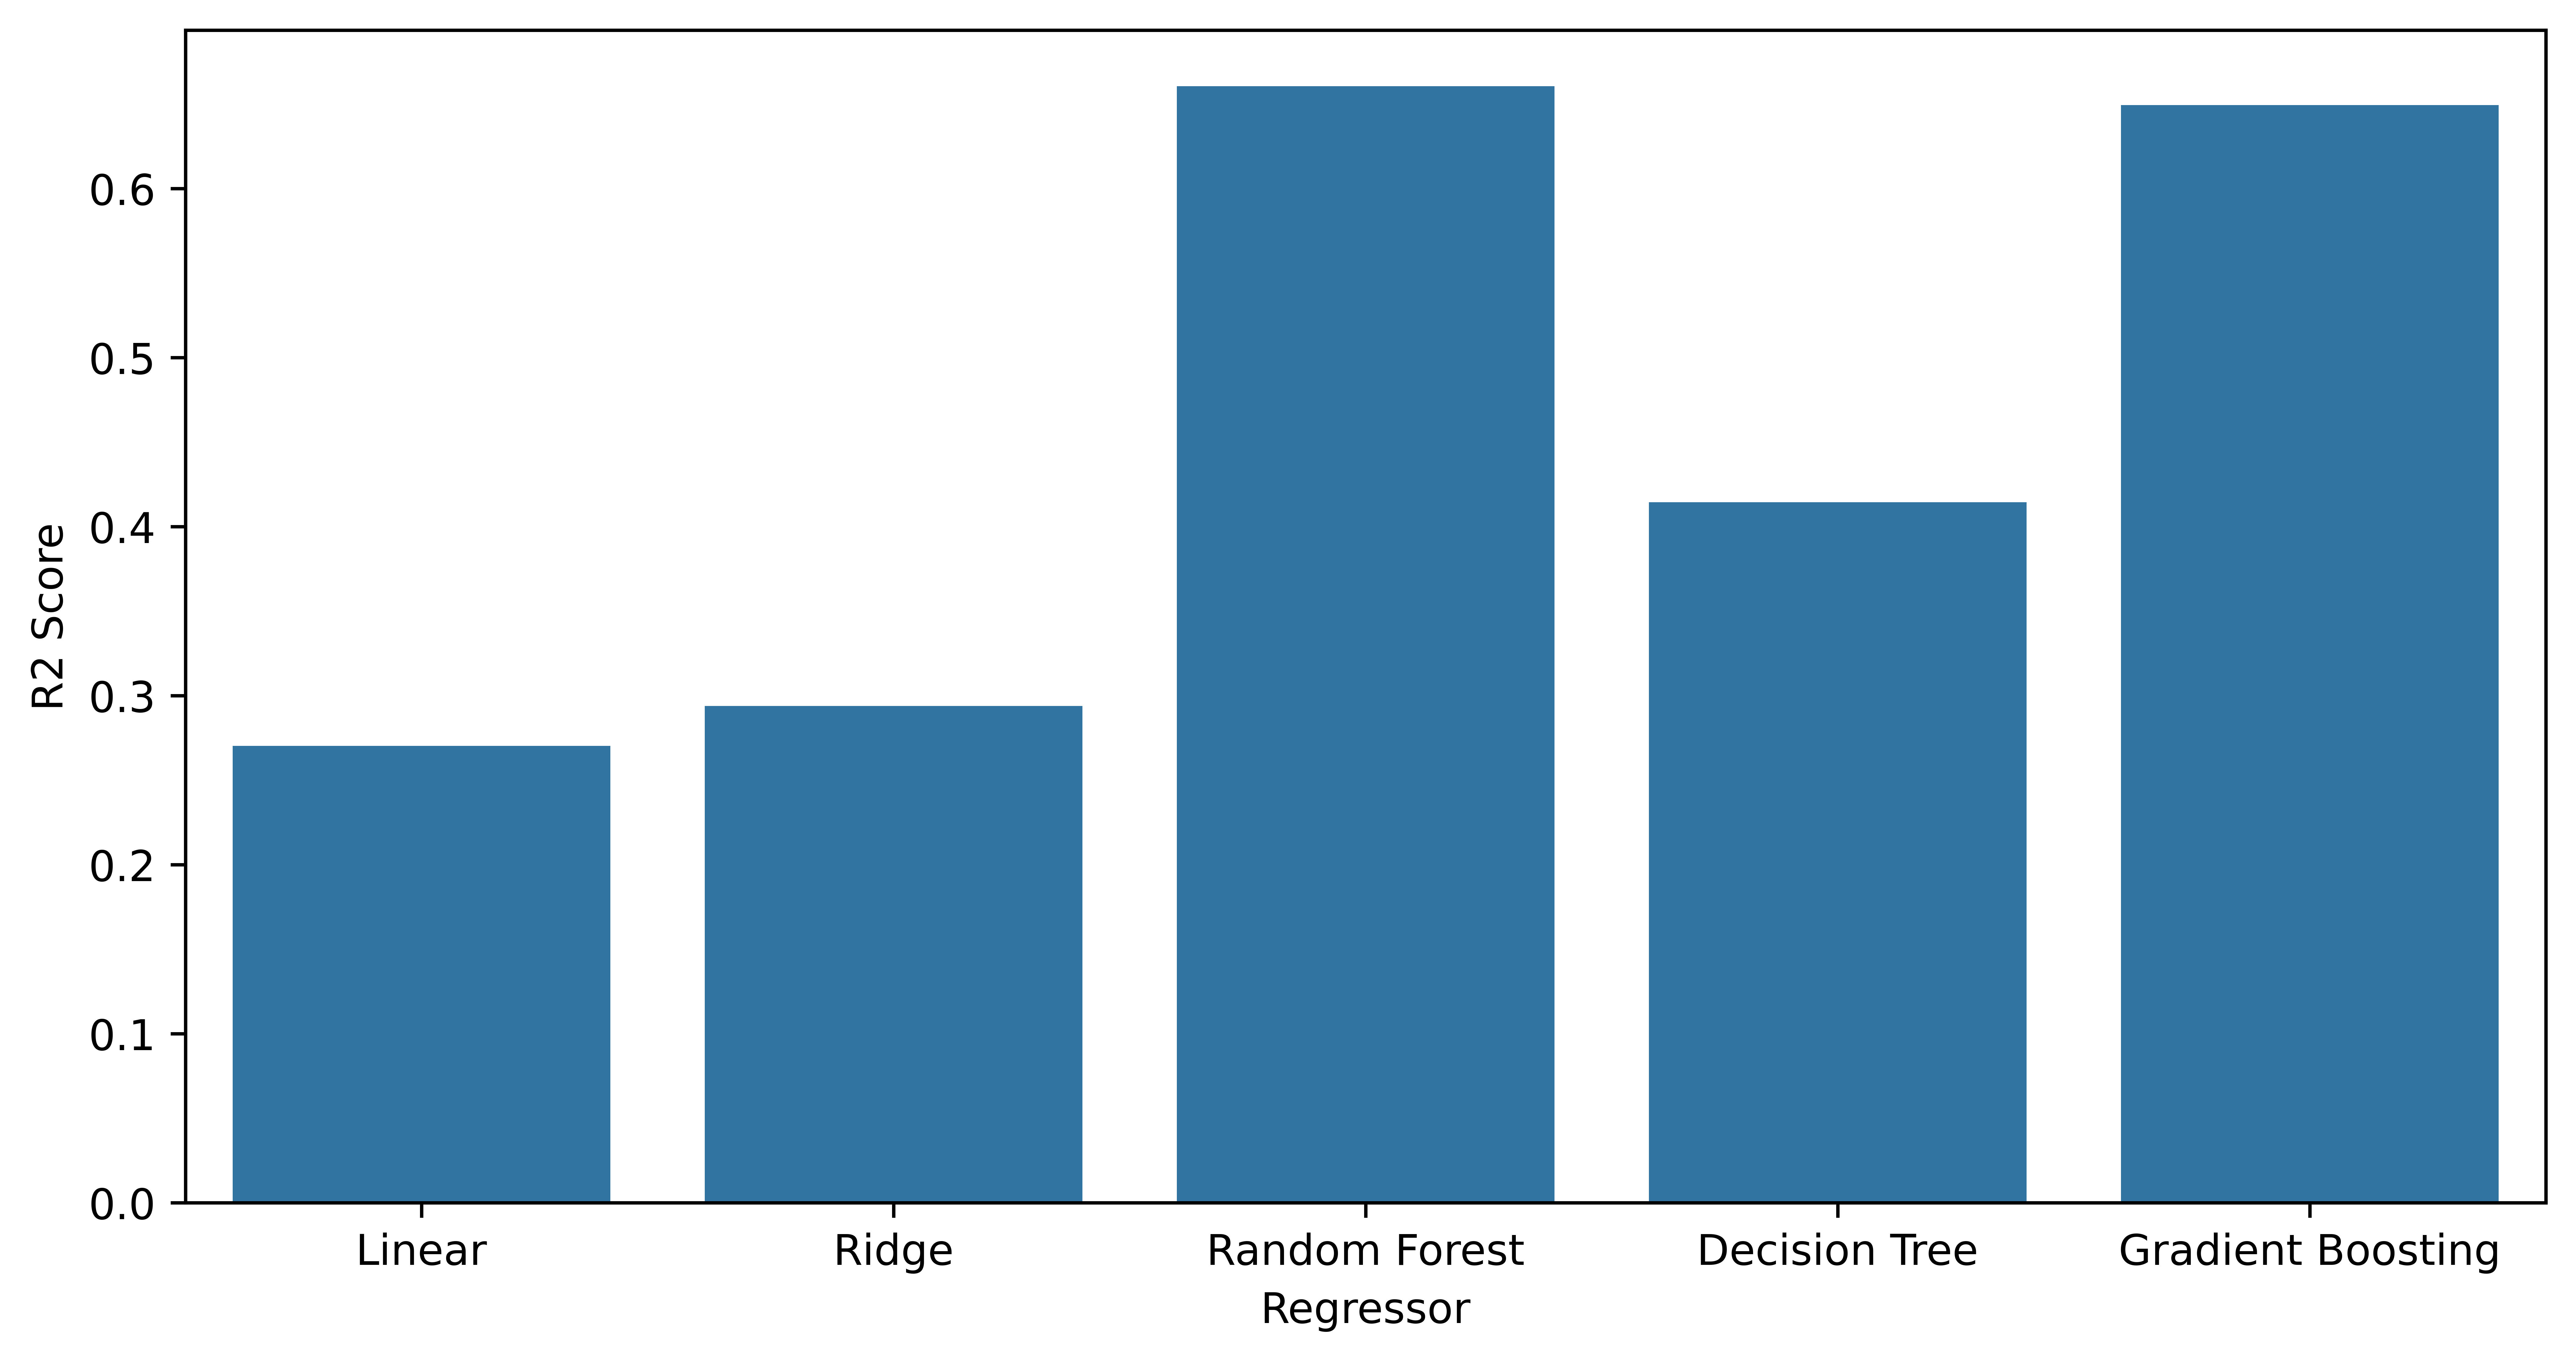

In [626]:
#Analyzing the best performing regression model
plt.figure(figsize = (10, 5), dpi = 1000)
sns.barplot(x = "Regressor", y = "R2 Score", data = results)
plt.savefig("Model Results")
plt.show()

### The Random forest regression model performed best

In [651]:
RFmodel = RandomForestRegressor()
RFmodel.fit(X, y)

RandomForestRegressor()

In [654]:
#Saving the model
with open("Prediction Model", "wb") as f:
    pickle.dump(RFmodel, f)